In [109]:
import numpy as np
import matplotlib.pyplot as plt

In [111]:
N = 300
D = 2
K = 3

In [112]:
X = np.zeros([N, D])
X[:100, :] = np.random.randn(100, D) + np.array([0, 0])
X[100:200, :] = np.random.randn(100, D) + np.array([5, 5])
X[200:300, :] = np.random.randn(100, D) + np.array([0, 5])
X

array([[-3.10511755e-01, -4.27339195e-01],
       [ 6.14111865e-01,  1.43406893e-01],
       [-2.07224822e-01, -1.77070730e-01],
       [ 2.85122764e+00,  2.14262032e-01],
       [-1.04886592e+00, -1.51300594e+00],
       [ 2.20248952e-02,  1.10443306e+00],
       [-1.20799849e+00,  1.31976195e+00],
       [ 7.30967733e-01, -1.80595050e-01],
       [-5.97852763e-02, -5.11118589e-01],
       [ 1.47938424e-01,  5.38523792e-01],
       [ 8.62141614e-01, -1.17692913e+00],
       [-1.14647143e+00, -7.41675012e-04],
       [ 9.16288721e-01,  8.54425703e-01],
       [-4.63332492e-01, -1.78893369e-01],
       [-9.57748588e-01, -1.52981368e-01],
       [-3.28559382e-01,  6.83330399e-02],
       [-5.05211811e-01,  7.09586343e-01],
       [-6.18247834e-01,  7.35767848e-01],
       [-1.38598179e+00, -6.98600205e-01],
       [-2.97527834e-01, -2.16942783e-01],
       [-8.20351936e-01,  3.26138551e-01],
       [ 1.71644848e+00,  1.81766366e+00],
       [ 2.77910728e-01, -7.05129675e-01],
       [ 2.

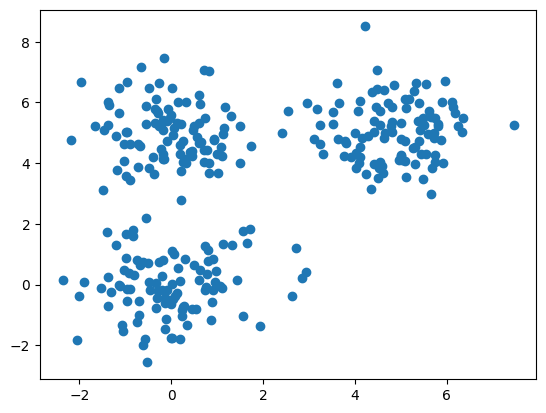

In [113]:
plt.scatter(X[:, 0], X[:, 1])


In [115]:
# choose clusters centers randomly:
clusters_centers = np.zeros((K, D))
for k in range(K):
    i = np.random.choice(N)
    clusters_centers[k] = X[i]
clusters_centers

array([[ 0.48560228,  5.20786122],
       [ 0.83005382,  7.01899644],
       [-0.17120265,  4.30363998]])

In [116]:
# k-means loop:
max_iter = 20
clusters_identities = np.zeros(N)
list_clusters_identities = []

for i in range(max_iter):
    old_clusters_identities = clusters_identities.copy()
    list_clusters_identities.append(old_clusters_identities)

    for n in range(N):
        closest_k = -1
        min_dist = float('inf')
        for k in range(K):
            d = (X[n] - clusters_centers[k]).dot(X[n] - clusters_centers[k])
            if d < min_dist:
                min_dist = d
                closest_k = k
        clusters_identities[n] = closest_k
    
    for k in range(K):
        clusters_centers[k, :] = X[clusters_identities==k].mean(axis=0)
    
    if np.all(old_clusters_identities == clusters_identities):
        print(f"Converged at step {i}")
        break

Converged at step 4


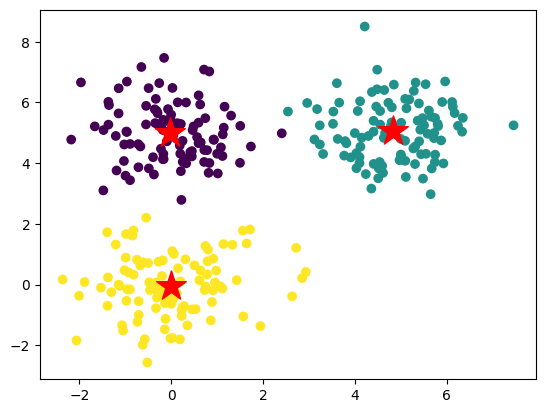

In [117]:
plt.scatter(X[:, 0], X[:, 1], c=clusters_identities)
plt.scatter(clusters_centers[:, 0], clusters_centers[:, 1], marker='*', s=500, c="red")

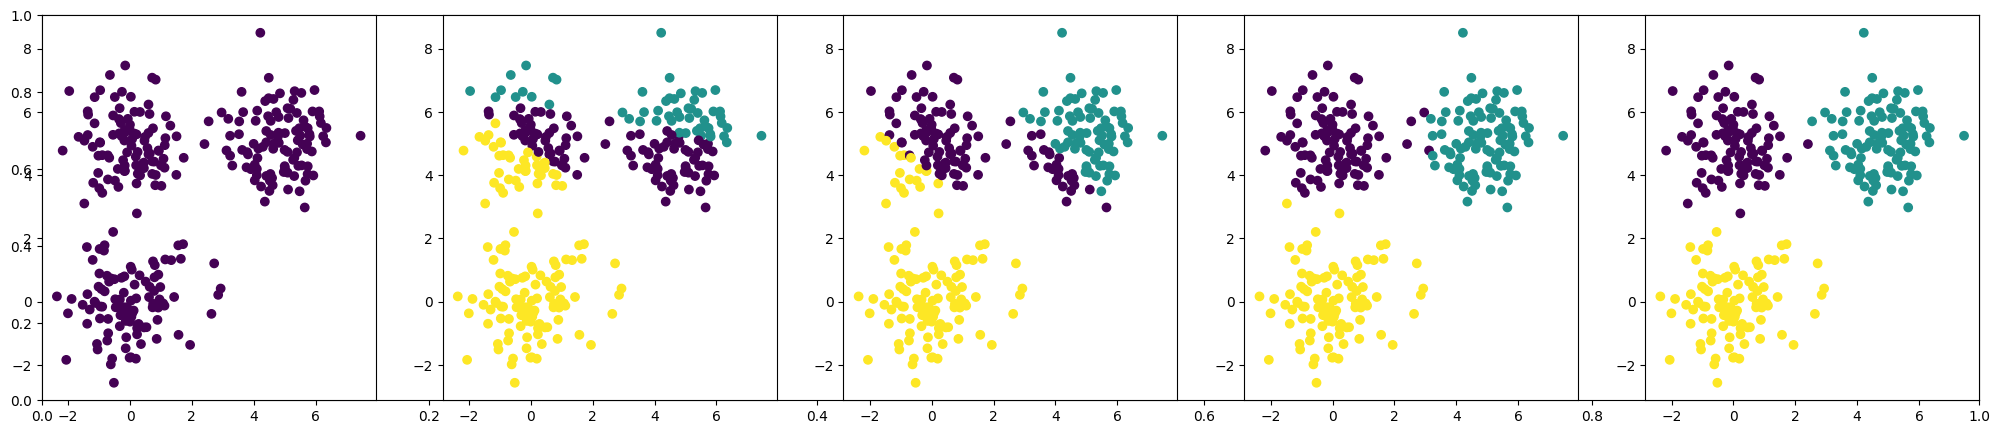

In [118]:
# show training process:
M = len(list_clusters_identities)
fig, ax = plt.subplots(figsize=(5*M, 5))
for i in range(M):
    plt.subplot(1, M, i+1)
    Y = list_clusters_identities[i]
    plt.scatter(X[:, 0], X[:, 1], c=Y)